In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 6,6

In [8]:
import time
import numpy as np

t = time.time()

N = 10000000
x = np.zeros(N).astype(int)
x[0] = 1
x[1] = 1

p = 0
while( p < np.sqrt(N)):
    p = p + 1
    while(x[p] == 1):
        p += 1
    x[2*p::p] = 1
    
P = np.where(x == 0)[0]

for k in 1+np.arange(100-1):
    print k,
    x = np.zeros(N).astype(int)
    for p in P[P < np.sqrt((k+1)*N)]:
        if( (k*N)% p == 0):
            x[0] = 1
        x[ p - (k*N % p)::p] = 1

    P = np.hstack((P, np.where(x == 0)[0] + k*N))

print time.time() - t
P.shape

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 41.9445061684


(50847534,)

In [24]:
(137 in P), (1337 in P), (13337 in P), (133337 in P), (1333337 in P), (13333337 in P), (133333337 in P)

(True, False, True, True, False, False, False)

In [18]:
sq = np.arange(np.sqrt(10**9)).astype(int)**2
sq

array([        0,         1,         4, ..., 999824400, 999887641,
       999950884])

# Sum of Two Squares

In [34]:
sqsq = {}

for p in P[P < 100000]:
    if p % 137 == 1:
        print p,
    x = [(t, np.sqrt(p - t**2).astype(int)) for t in np.arange( np.sqrt(p) ).astype(int) if p - t**2 in sq]
    sqsq[p] = x
    
sqsq

823 1097 2467 2741 4111 4933 6029 6577 7673 8221 9043 10139 10687 11783 14249 14797 15619 19181 20551 21647 22469 23017 23291 24113 27127 28771 29867 30689 31237 31511 32059 33703 37813 42197 43019 44389 46307 47129 47951 50417 51239 51787 52609 52883 55897 56171 56993 58363 61651 62473 65213 65761 67679 68227 68501 71789 72337 73433 77269 77543 79187 80557 80831 83023 86311 87133 87407 89051 89599 91243 93983 94531 96997 98641

{65537: [(1, 256), (256, 1)],
 2: [(1, 1)],
 3: [],
 5: [(1, 2), (2, 1)],
 7: [],
 11: [],
 13: [(2, 3), (3, 2)],
 32783: [],
 17: [(1, 4), (4, 1)],
 19: [],
 32789: [(70, 167), (167, 70)],
 23: [],
 65563: [],
 29: [(2, 5), (5, 2)],
 31: [],
 32801: [(100, 151), (151, 100)],
 32803: [],
 37: [(1, 6), (6, 1)],
 41: [(4, 5), (5, 4)],
 43: [],
 65581: [(166, 195), (195, 166)],
 47: [],
 65587: [],
 53: [(2, 7), (7, 2)],
 59: [],
 61: [(5, 6), (6, 5)],
 32831: [],
 32833: [(57, 172), (172, 57)],
 67: [],
 71: [],
 73: [(3, 8), (8, 3)],
 32843: [],
 79: [],
 65617: [(9, 256), (256, 9)],
 83: [],
 98389: [(210, 233), (233, 210)],
 92857: [(21, 304), (304, 21)],
 89: [(5, 8), (8, 5)],
 65551: [],
 65629: [(102, 235), (235, 102)],
 97: [(4, 9), (9, 4)],
 60091: [],
 101: [(1, 10), (10, 1)],
 103: [],
 107: [],
 84017: [(164, 239), (239, 164)],
 109: [(3, 10), (10, 3)],
 65647: [],
 113: [(7, 8), (8, 7)],
 65651: [],
 32887: [],
 65657: [(11, 256), (256, 11)],
 98429: [(85, 302), (302, 85)],
 

(0.0, 350.0, 0.0, 350.0)

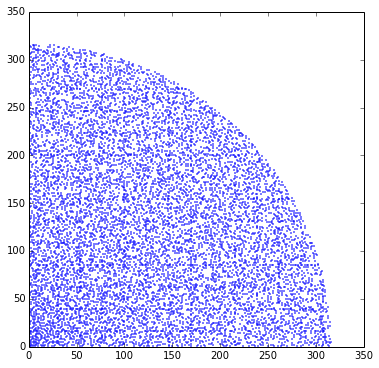

In [37]:
pt = []
for p in sqsq:
    for aabb in sqsq[p]:
        pt += [aabb]
        
pt = np.array(pt)
plt.plot(pt[:,0], pt[:,1], '.', markersize = 2)
plt.axis("Equal")

(100, 200)

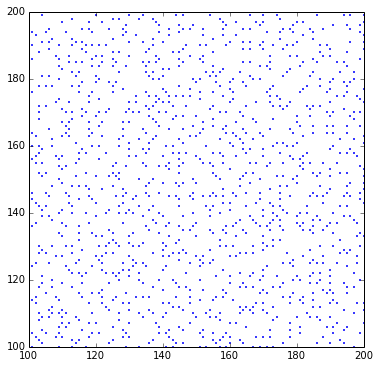

In [39]:
pt = []
for p in sqsq:
    for aabb in sqsq[p]:
        pt += [aabb]
        
pt = np.array(pt)
plt.plot(pt[:,0], pt[:,1], '.', markersize = 3)
plt.axis("Equal")

plt.xlim([100, 200])
plt.ylim([100, 200])

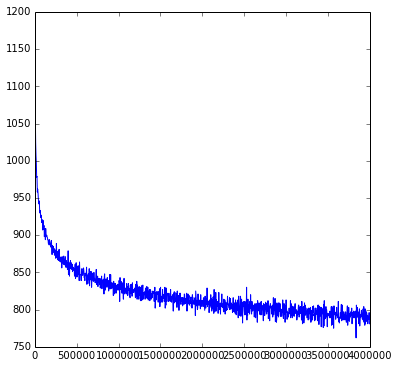

In [36]:
n  = np.arange(2000)
sq = np.unique(n[...,None]**2 + n[None,...]**2)

sq = sq[sq < 4*10**6]

N = 1000

H = np.histogram(sq, bins=N)

plt.plot( 0.5*(H[1][:-1] + H[1][1:]), H[0]*1.0, '-')

In [37]:
[x for x in sq[:100] if x in P]

[2,
 5,
 13,
 17,
 29,
 37,
 41,
 53,
 61,
 73,
 89,
 97,
 101,
 109,
 113,
 137,
 149,
 157,
 173,
 181,
 193,
 197,
 229,
 233,
 241,
 257]

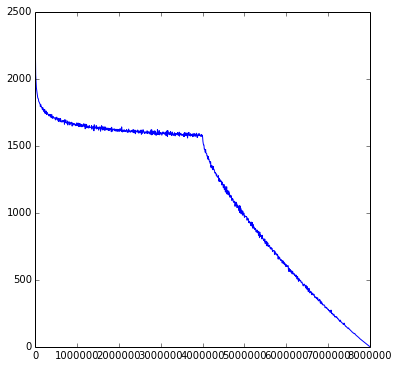

In [28]:
n  = np.arange(2000)
sq = np.unique(n[...,None]**2 + n[None,...]**2)

#sq = sq[sq < 4*10**6]

N = 1000

H = np.histogram(sq, bins=N)

plt.plot( 0.5*(H[1][:-1] + H[1][1:]), H[0]*1.0, '-')

# $ n = \square + 2 \square $

In [40]:
sqsq = {}

for p in P[P < 100000]:
    if p % 137 == 1:
        print p,
    x = [(t, np.sqrt(p - 2*t**2).astype(int)) for t in np.arange( np.sqrt(p) ).astype(int) if p - 2*t**2 in sq]
    sqsq[p] = x
    
sqsq

823 1097 2467 2741 4111 4933 6029 6577 7673 8221 9043 10139 10687 11783 14249 14797 15619 19181 20551 21647 22469 23017 23291 24113 27127 28771 29867 30689 31237 31511 32059 33703 37813 42197 43019 44389 46307 47129 47951 50417 51239 51787 52609 52883 55897 56171 56993 58363 61651 62473 65213 65761 67679 68227 68501 71789 72337 73433 77269 77543 79187 80557 80831 83023 86311 87133 87407 89051 89599 91243 93983 94531 96997 98641

{65537: [(16, 255)],
 2: [(1, 0)],
 3: [(1, 1)],
 5: [],
 7: [],
 11: [(1, 3)],
 13: [],
 32783: [],
 17: [(2, 3)],
 19: [(3, 1)],
 32789: [],
 23: [],
 65563: [(81, 229)],
 29: [],
 31: [],
 32801: [(94, 123)],
 32803: [(33, 175)],
 37: [],
 41: [(4, 3)],
 43: [(3, 5)],
 65581: [],
 47: [],
 65587: [(153, 137)],
 53: [],
 59: [(5, 3)],
 61: [],
 32831: [],
 32833: [(6, 181)],
 67: [(3, 7)],
 71: [],
 73: [(6, 1)],
 32843: [(53, 165)],
 79: [],
 65617: [(48, 247)],
 83: [(1, 9)],
 98389: [],
 92857: [(54, 295)],
 89: [(2, 9)],
 65551: [],
 65629: [],
 97: [(6, 5)],
 60091: [(75, 221)],
 101: [],
 103: [],
 107: [(7, 3)],
 84017: [(118, 237)],
 109: [],
 65647: [],
 113: [(4, 9)],
 65651: [(131, 177)],
 32887: [],
 65657: [(154, 135)],
 98429: [],
 127: [],
 131: [(5, 9)],
 137: [(8, 3)],
 72019: [(183, 71)],
 139: [(3, 11)],
 32909: [],
 32911: [],
 149: [],
 151: [],
 87407: [],
 157: [],
 10949: [],
 163: [(9, 1)],
 32933: [],
 68087: [],
 167: [],
 98473: [(168, 205)],
 32939: [(43,

(0.0, 250.0, 0.0, 350.0)

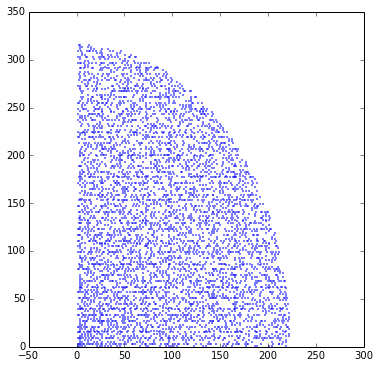

In [41]:
pt = []
for p in sqsq:
    for aabb in sqsq[p]:
        pt += [aabb]
        
pt = np.array(pt)
plt.plot(pt[:,0], pt[:,1], '.', markersize = 2)
plt.axis("Equal")

(50, 150)

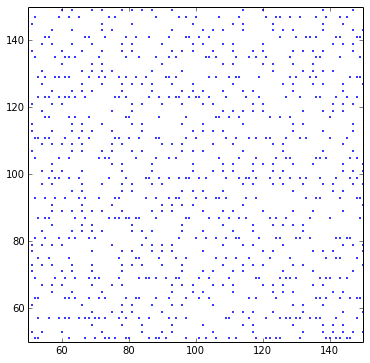

In [42]:
pt = []
for p in sqsq:
    for aabb in sqsq[p]:
        pt += [aabb]
        
pt = np.array(pt)
plt.plot(pt[:,0], pt[:,1], '.', markersize = 3)
plt.axis("Equal")

plt.xlim([50, 150])
plt.ylim([50, 150])

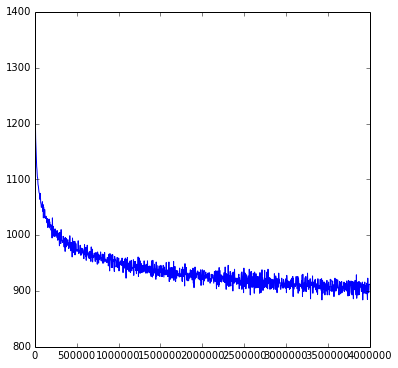

In [29]:
n  = np.arange(2000)
sq = np.unique(n[...,None]**2 + 2*n[None,...]**2)

sq = sq[sq < 4*10**6]

N = 1000

H = np.histogram(sq, bins=N)

plt.plot( 0.5*(H[1][:-1] + H[1][1:]), H[0]*1.0, '-')

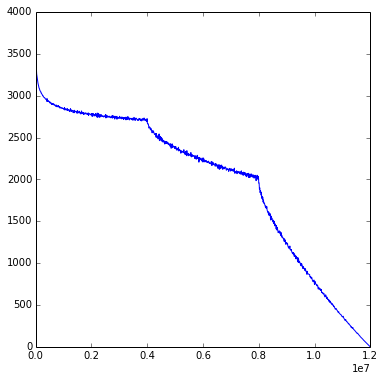

In [31]:
n  = np.arange(2000)
sq = np.unique(n[...,None]**2 + 2*n[None,...]**2)

#sq = sq[sq < 4*10**6]

N = 1000

H = np.histogram(sq, bins=N)

plt.plot( 0.5*(H[1][:-1] + H[1][1:]), H[0]*1.0, '-')

# Arbitrary $x^2 + dy^2 $

In [31]:
d = 13

n = np.arange(100)

sqsq = {}

for p in P[P < 10000]:
    if p % 137 == 1:
        print p,
    x = [(np.sqrt(p - d*t**2).astype(int), t) for t in np.arange( np.sqrt(p) ).astype(int) if p - d*t**2 in n**2]
    sqsq[p] = x
sqsq

823 1097 2467 2741 4111 4933 6029 6577 7673 8221 9043

{2: [],
 3: [],
 5851: [],
 5: [],
 7: [],
 7297: [(63, 16)],
 11: [],
 13: [(0, 1)],
 2063: [],
 17: [(2, 1)],
 19: [],
 2069: [],
 23: [],
 8761: [(83, 12)],
 5807: [],
 29: [(4, 1)],
 3547: [],
 31: [],
 2081: [(38, 7)],
 8389: [(89, 6)],
 2083: [],
 8647: [],
 37: [],
 2087: [],
 8429: [],
 41: [],
 4651: [],
 43: [],
 8237: [],
 47: [],
 2099: [],
 53: [(1, 2)],
 6199: [],
 4639: [],
 4153: [],
 59: [],
 61: [(3, 2)],
 2111: [],
 8731: [],
 2113: [],
 67: [],
 8663: [],
 71: [],
 4583: [],
 73: [],
 8887: [],
 6221: [],
 4283: [],
 79: [],
 2129: [(46, 1)],
 8527: [],
 83: [],
 6229: [],
 3769: [(21, 16)],
 89: [],
 4111: [],
 2141: [(29, 10)],
 2143: [],
 97: [],
 7867: [],
 8293: [(60, 19)],
 101: [(7, 2)],
 2551: [],
 103: [],
 7573: [],
 2153: [],
 107: [],
 9619: [],
 109: [],
 2749: [],
 113: [(10, 1)],
 9551: [],
 4211: [],
 6263: [],
 4217: [],
 7369: [],
 4219: [],
 6269: [(61, 14)],
 127: [],
 7927: [],
 131: [],
 4229: [(41, 14)],
 4231: [],
 8597: [(80, 13)],
 137: [],

In [32]:
n  = np.arange(200)

sq = np.unique(d*n[...,None]**2 + n[None,...]**2)

sq = sq[sq < 10**4]

sq

array([   0,    1,    4, ..., 9981, 9988, 9998])

In [33]:
PQ = []

t = 0

for x in sq:
    while P[t] < x:
        t += 1
    if P[t] == x:
        PQ += [x]
print PQ

[13, 17, 29, 53, 61, 101, 113, 157, 173, 181, 233, 257, 269, 277, 313, 337, 373, 389, 433, 521, 569, 601, 641, 653, 673, 677, 701, 757, 797, 809, 829, 857, 881, 937, 953, 997, 1013, 1049, 1069, 1093, 1109, 1117, 1153, 1193, 1213, 1249, 1277, 1297, 1301, 1361, 1381, 1429, 1433, 1453, 1481, 1609, 1613, 1621, 1637, 1693, 1733, 1741, 1777, 1873, 1889, 1901, 1933, 1949, 1973, 1993, 2029, 2053, 2081, 2089, 2129, 2141, 2161, 2213, 2237, 2297, 2341, 2357, 2389, 2393, 2417, 2441, 2473, 2521, 2549, 2557, 2609, 2617, 2677, 2713, 2729, 2753, 2833, 2837, 2857, 2861, 2909, 3041, 3121, 3137, 3169, 3181, 3221, 3253, 3301, 3329, 3389, 3433, 3449, 3457, 3461, 3533, 3613, 3617, 3637, 3701, 3709, 3761, 3769, 3793, 3797, 3821, 3877, 3917, 3929, 4001, 4013, 4021, 4057, 4073, 4133, 4157, 4177, 4229, 4241, 4261, 4273, 4289, 4397, 4421, 4481, 4549, 4637, 4657, 4729, 4733, 4793, 4801, 4813, 4861, 4889, 4937, 4957, 4969, 4993, 5009, 5021, 5113, 5197, 5209, 5261, 5281, 5333, 5381, 5417, 5437, 5477, 5521, 5573, 55

In [88]:
x = sqsq[8807][0]
x, x[0]**2 + 7*x[1]**2

((92, 7), 8807)

In [100]:
sq[:100]

array([  0,   1,   4,   7,   8,   9,  11,  16,  23,  25,  28,  29,  32,
        36,  37,  43,  44,  49,  53,  56,  63,  64,  67,  71,  72,  77,
        79,  81,  88,  92,  99, 100, 107, 109, 112, 113, 116, 121, 127,
       128, 137, 144, 148, 149, 151, 161, 163, 169, 172, 175, 176, 179,
       184, 191, 193, 196, 197, 200, 203, 207, 211, 212, 224, 225, 232,
       233, 239, 252, 253, 256, 259, 261, 263, 268, 275, 277, 281, 284,
       288, 289, 296, 301, 308, 316, 317, 319, 324, 331, 333, 337, 343,
       344, 347, 352, 359, 361, 368, 371, 373, 379])

# GCD in $\mathbb{Z}[i]$

In [56]:
N = 200
x = np.arange(N)
y = np.arange(N)


z = np.vstack(
    (np.reshape(x[..., None]**2 +   x[None,...]**2, N**2),
     np.reshape(x[..., None]**2 + 2*x[None,...]**2, N**2))
          )
print z[:,0],
z

[0 0]

array([[     0,      1,      4, ...,  78410,  78805,  79202],
       [     0,      2,      8, ..., 117219, 118009, 118803]])

[1, 4, 4, 4, 9, 16, 16, 9, 16, 36, 36, 16, 49, 64, 36, 16, 81, 64, 100, 36, 64, 144, 144, 36, 121, 196, 121, 64, 225]


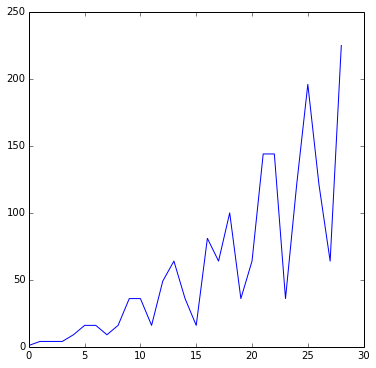

In [58]:
val = []
for m in range(1,30):
    val += [len(set([(x[0] % m,x[1] % m) for x in z.T]))]
    
print val    
plt.plot(val)

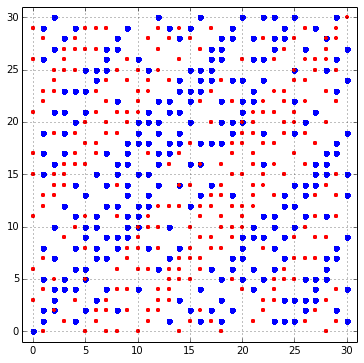

In [69]:
m = 31
plt.plot(z[0] % m, z[1] % m,  'b.', markersize=10, alpha=0.5)

#m = 11
plt.plot( m - 1 - z[0] % m,  m-1 - z[1] % m,  'r.', markersize=5, alpha=0.5)

#m = 7
#plt.plot(z[0] % m, z[1] % m,  '.', markersize=10)

#m = 14
#plt.plot(z[0] % m, z[1] % m,  '.', markersize=5)

plt.xlim([-1,m])
plt.ylim([-1,m])
plt.grid(True)

In [119]:
set([ (x[0], x[1]) for x in z.T])

{(3250, 6275),
 (15170, 22059),
 (10180, 16264),
 (530, 531),
 (11925, 19494),
 (7085, 13974),
 (405, 729),
 (5490, 7011),
 (10125, 10449),
 (2440, 4556),
 (3393, 6642),
 (10000, 13600),
 (4490, 6171),
 (9700, 12004),
 (7362, 12123),
 (1025, 2049),
 (18068, 26532),
 (293, 297),
 (6464, 12864),
 (8917, 17753),
 (2393, 3417),
 (145, 226),
 (11413, 16742),
 (8885, 13926),
 (980, 1764),
 (4625, 4626),
 (8389, 16489),
 (8840, 10284),
 (12349, 19073),
 (6500, 12900),
 (1234, 2459),
 (1097, 1353),
 (1901, 2577),
 (8177, 11313),
 (8237, 9078),
 (5008, 7312),
 (8290, 13331),
 (5305, 5426),
 (842, 1683),
 (7677, 12438),
 (3145, 3154),
 (8125, 9025),
 (277, 473),
 (4689, 5778),
 (9325, 17425),
 (3545, 7026),
 (7778, 9627),
 (4234, 6259),
 (1937, 3873),
 (7421, 14646),
 (13765, 23174),
 (884, 1368),
 (10034, 12843),
 (15688, 21772),
 (1261, 2486),
 (7789, 14678),
 (7240, 12716),
 (2722, 5323),
 (4129, 7729),
 (4640, 7344),
 (11322, 12843),
 (1945, 3881),
 (12456, 16812),
 (1445, 2889),
 (5800, 101

In [5]:
def f(x):
    return 2*x

In [6]:
f(4), f("abc"), f([2])

(8, 'abcabc', [2, 2])

In [18]:
x = np.arange(100)
np.average(x**2)

3283.5

3283.5

In [ ]:
X = [x**2 for x in range(100)]
sum(X)*1.0/len(X)